In [1]:
# Projeto 7DaysOfCode
# Análise dos dados do Senado
# CEAPS (Cota para Exercício da Atividade Parlamentar dos Senadores)
# by geanclm in 22/04/2022

```
Facebook Prophet: biblioteca de previsão
```
[Installation in Python](https://facebook.github.io/prophet/docs/installation.html)

[Quick Start](https://facebook.github.io/prophet/docs/quick_start.html?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+3%2F7%3A+Forecasting&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+3%2F7%3A+Modelando+um+dom%C3%ADnio#python-api)

In [5]:
# !pip install pystan==2.19.1.1

In [4]:
# !pip install prophet

In [42]:
# import libs
import pandas as pd
import matplotlib as plt
from prophet import Prophet

In [61]:
df_ds_y = pd.read_csv('/content/dataset_ceaps_forecasting.csv',
                     encoding='cp1252', dayfirst=True, parse_dates=['ds'])

In [62]:
df_ds_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1461 non-null   datetime64[ns]
 1   y       1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [36]:
df_ds_y.describe()

,y
count,1461.000000
mean,63876.044497
std,53285.501861
min,100.000000
25%,19735.990000
50%,53764.030000
75%,91485.640000
max,444152.910000


In [59]:
df_ds_y.sample(5)

,y
ds,
2018-05-06,8318.03
2018-11-08,141788.41
2020-02-26,22360.00
2019-04-04,96553.59
2021-07-23,56945.89


In [24]:
# Período inicial
df_ds_y['ds'].min()

Timestamp('2018-01-01 00:00:00')

In [25]:
# Período final
df_ds_y['ds'].max()

Timestamp('2021-12-31 00:00:00')

In [67]:
df_ds_y_index = df_ds_y.set_index('ds')

<center style="font-size:18pt; background-color:orange">
    <br/><b>TOTAL REEMBOLSO 31 DE DEZEMBRO DE 2021</b><br/>&nbsp;</center>

In [63]:
df_ds_y.tail(1)

,ds,y
1460,2021-12-31,27219.41


In [68]:
df_ds_y_index.tail(1)

,y
ds,
2021-12-31,27219.41


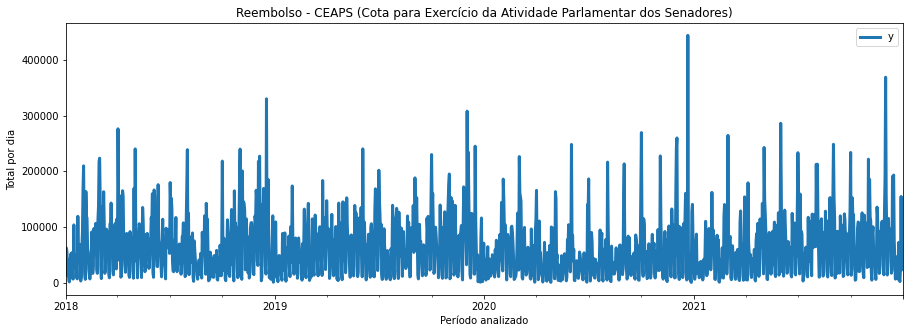

In [69]:
df_ds_y_index.plot(figsize=(15,5),
             linewidth=3,
             fontsize=10,
             title='Reembolso - CEAPS (Cota para Exercício da Atividade Parlamentar dos Senadores)',
             xlabel='Período analizado',
             ylabel= 'Total por dia');

In [ ]:
# É visível no gráfico a acentuação de gastos nos finais de ano.
# Se o gasto é alto nesse período porque não temos o retorno em obras públicas na mesma escala?

In [70]:
# Dataframe reservado para o critério da lib prophet (empresa META)
df_ds_y

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


In [76]:
# Preparando cada parte dos dados para aplicar o Prophet
dataset = df_ds_y[(df_ds_y['ds'].dt.year < 2021) ] # dados treiro
validation = df_ds_y[(df_ds_y['ds'].dt.year == 2021)] # dados para teste